This project is focused on learning how to display data in various types of graph formats. This can be done by importing matplotlib along with the data file. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In this project, we seek to visualize the data and find answers to questions like: 
1. Do students in more popular majors make more money?
2. How many majors are predominantly male? Predominantly female?
3. Which category of majors have the most students?

Here are some of the columns in the dataset:
*insert table*
Rank - Rank by median earnings (the dataset is ordered by this column).
Major_code - Major code.
Major - Major description.
Major_category - Category of major.
Total - Total number of people with major.
Sample_size - Sample size (unweighted) of full-time.
Men - Male graduates.
Women - Female graduates.
ShareWomen - Women as share of total.
Employed - Number employed.
Median - Median salary of full-time, year-round workers.
Low_wage_jobs - Number in low-wage service jobs.
Full_time - Number employed 35 hours or more.
Part_time - Number employed less than 35 hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
#use df.iloc[] to return the first row formatted as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
#display all columns
pd.set_option('display.max_columns', None)
#explore the first 5 rows
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
#display last 5 rows
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
#generate summary statistics
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


There seem to be some missing values under the `Total`, `Men`, `Women` and `ShareWomen` columns as the count is 172 instead of 173 like the rest of the columns.

In [6]:
raw_data_count= len(recent_grads.index)
raw_data_count

173

In [7]:
#drop rows that have missing values
recent_grads=recent_grads.dropna()
len(recent_grads.index)

172

In [8]:
cleaned_data_count=len(recent_grads.index)

# Visualizing data with scatter plots

A scatter chart works best when comparing large numbers of data points without regard to time. This is a very powerful type of chart and good when your are trying to show the relationship between two variables (x and y axis). Let us explore the use of scatter plots below.

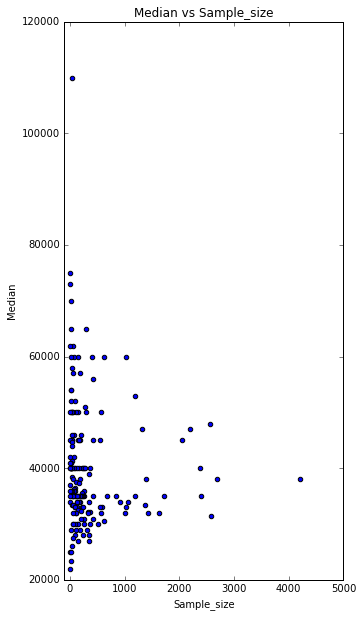

In [9]:
#plot Median vs Sample_size
ax1=recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs Sample_size', figsize=(5,10)
                      ,ylim=(20000,120000), xlim=(-100,5000))

In the diagram above, we can see that the `Median` salary earned does not increase with more popular majors. Instead, it falls between the 30,000 and 50,000 range.

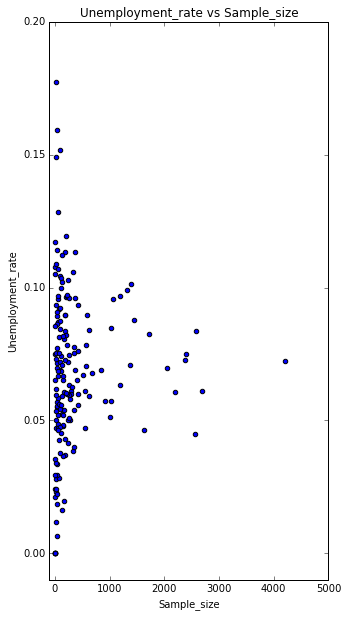

In [10]:
#plot Unemployment_rate vs Sample_size
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment_rate vs Sample_size', 
                        figsize=(5,10), ylim=(-0.01,0.20), xlim=(-100,5000))

As shown above, the Unemployment_rate also had the largest spread when the sample_size is small. This suggests that the greater the sample_size, the more accurate the data seems to be. The points generally converge towards the 0.10 and 0.05 Unemployment rate range. This could be due to insufficient sample size or it could simply represent majors that are less popular, resulting in a high unemployment rate. We can verify this by comparing the sample_size with the Total number of students.

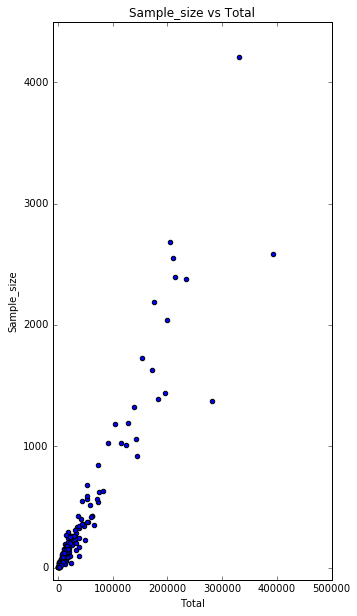

In [11]:
#plot Sample_size vs Total
ax3= recent_grads.plot(x='Total', y='Sample_size', kind='scatter', title='Sample_size vs Total', figsize=(5,10),
                      ylim=(-100,4500), xlim=(-10000,500000))

As seen in this figure, most of the sample_size increase in proportion with the total number of students enrolled in each major. However, this is not enough to show that the Unemployment rate or Median is unaffected by a lack of sample size. Let us look at the sample_size column to investigate further.

In [12]:
recent_grads["Sample_size"].value_counts().sort_index()

2       1
3       2
4       3
5       2
7       3
8       1
9       1
10      2
11      1
13      1
14      1
16      1
17      1
18      1
21      1
22      3
24      2
25      1
26      2
28      1
29      1
30      2
31      2
32      1
36      2
37      2
38      1
39      1
43      1
44      1
       ..
541     1
546     1
565     1
569     1
590     1
623     1
631     1
681     1
843     1
919     1
1014    1
1024    1
1029    1
1058    1
1186    1
1196    1
1322    1
1370    1
1387    1
1436    1
1629    1
1728    1
2042    1
2189    1
2380    1
2394    1
2554    1
2584    1
2684    1
4212    1
Name: Sample_size, Length: 147, dtype: int64

It is shown here that the sample_size for some rows are too low to be considered as an accurate representation of that particular major. As the main focus of this project is not data cleaning, we will not remove these rows.

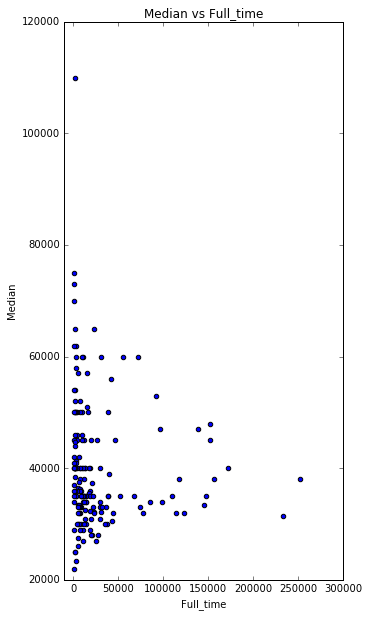

In [13]:
#plot Full_time vs Median
ax4=recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Median vs Full_time', figsize=(5,10), ylim=(20000,120000), 
                      xlim=(-10000,300000))

The above plot represents the number of graduates from each major that are employed as a `Full_time` staff and the `Median` salary of these graduates. We can see that the `Median` salary of graduates have a wider range and concentrate between the 30,000 to 40,000 range when the number of `Full-time` employees is lower. In general, the `Median` salary for majority of the courses lie between 20,000 and 60,000. With the majors that have the highest number of `Full-time` staff earning near the 30,000 to 40,000 range. This may be an indication on the oversupply of graduates in this industry, resulting in lower Median salary even as `Full-time` employees.

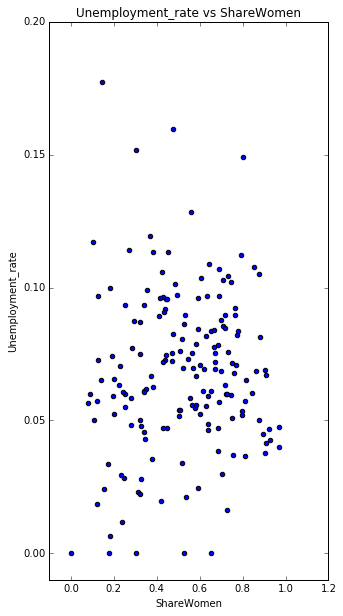

In [14]:
#plot ShareWomen vs Unemployment_rate
ax5=recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Unemployment_rate vs ShareWomen', 
                      figsize=(5,10), ylim=(-0.01,0.2), xlim=(-0.1,1.2))

There is no clear correlation between the proportion of Women in a major and the unemployment_rate.

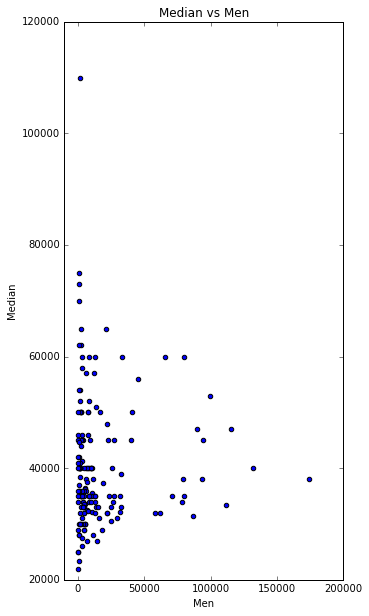

In [15]:
#plot Men vs Median
ax6=recent_grads.plot(x='Men', y='Median', kind='scatter', title='Median vs Men', figsize=(5,10), ylim=(20000,120000), 
                      xlim=(-10000,200000))

The plot suggests that the number of `Men` in the major has no direct correlation with the `Median` salary. Majority of the `Median` salary gravitate towards the 30,000 to 50,000 region.

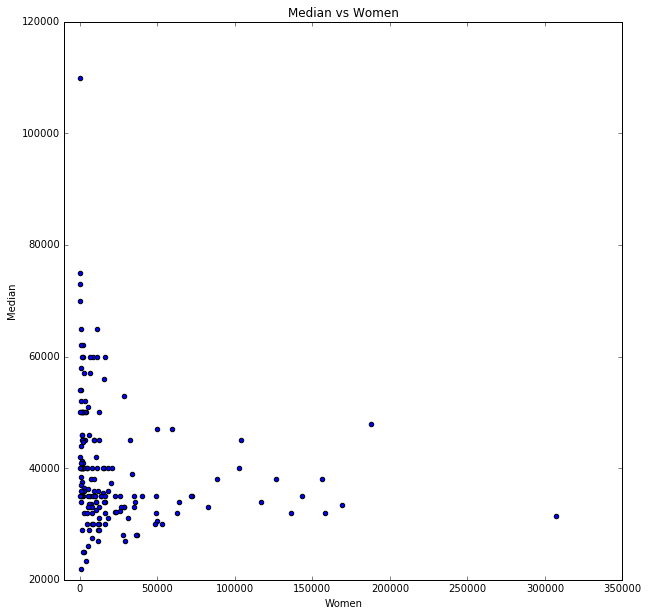

In [16]:
#plot Women vs Median
ax7=recent_grads.plot(x='Women', y='Median', kind='scatter', title='Median vs Women', figsize=(10,10), ylim=(20000,120000),
                     xlim=(-10000,350000))

The plot suggests that the number of `Women` in the major has no direct correlation with the `Median` salary. As with the plot of `Median vs Men`, majority of the `Median` salary gravitate towards the 30,000 to 50,000 region.


# Visualizing data with Histograms
A Histogram is often used to visualize discrete or continuous data.
Let us now visualize the plots as histograms.

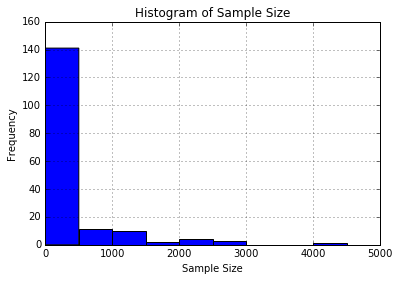

In [17]:
ax = recent_grads["Sample_size"].hist(bins=10, range=(0,5000))
plt.xlabel("Sample Size")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Size")
plt.show()

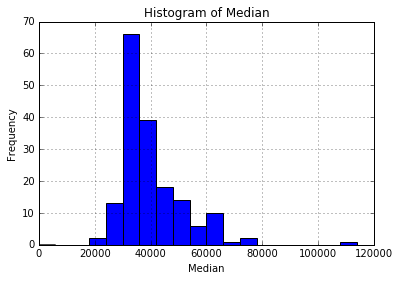

In [18]:
ax =recent_grads["Median"].hist(bins=20, range=(0,120000))
plt.xlabel("Median")
plt.ylabel("Frequency")
plt.title("Histogram of Median")
plt.show()

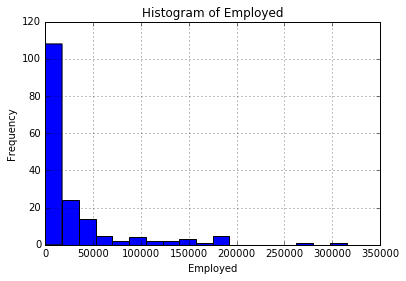

In [19]:
ax =recent_grads["Employed"].hist(bins=20, range=(0,350000))
plt.xlabel("Employed")
plt.ylabel("Frequency")
plt.title("Histogram of Employed")
plt.show()

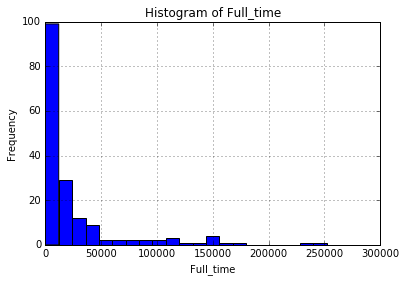

In [20]:
ax =recent_grads["Full_time"].hist(bins=25, range=(0,300000))
plt.xlabel("Full_time")
plt.ylabel("Frequency")
plt.title("Histogram of Full_time")
plt.show()

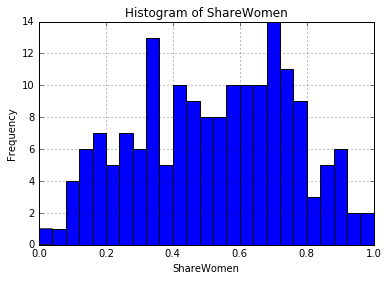

In [21]:
ax =recent_grads["ShareWomen"].hist(bins=25, range=(0,1))
plt.xlabel("ShareWomen")
plt.ylabel("Frequency")
plt.title("Histogram of ShareWomen")
plt.show()

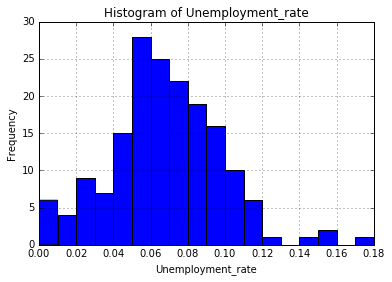

In [22]:
ax =recent_grads["Unemployment_rate"].hist(bins=18, range=(0,0.18))
plt.xlabel("Unemployment_rate")
plt.ylabel("Frequency")
plt.title("Histogram of Unemployment_rate")
ax.set_xticks(np.arange(0,0.18001,0.02))
plt.xlim(0,0.18)
plt.show()

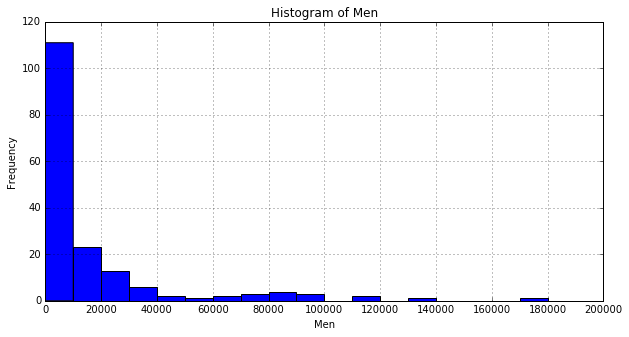

In [23]:
fig = plt.figure(figsize=(10,5))
ax =recent_grads["Men"].hist(bins=20, range=(0,200000))
plt.xlabel("Men")
plt.ylabel("Frequency")
plt.title("Histogram of Men")
ax.set_xticks(np.arange(0,200001,20000))
plt.show()

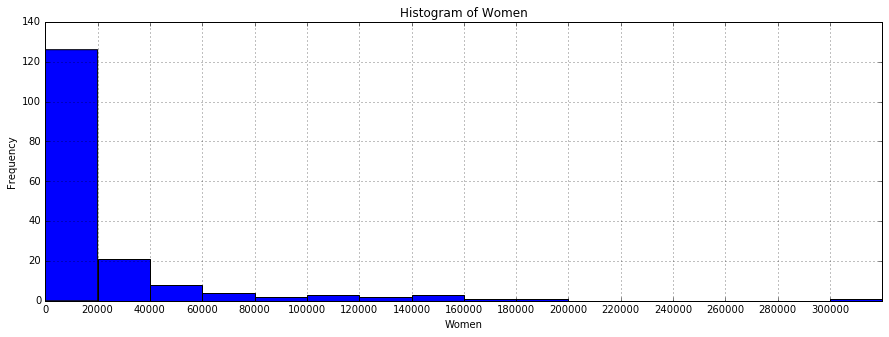

In [24]:
fig = plt.figure(figsize=(15,5))
ax =recent_grads["Women"].hist(bins=16, range=(0,320000))
plt.xlabel("Women")
plt.ylabel("Frequency")
plt.title("Histogram of Women")
ax.set_xticks(np.arange(0,320000,20000))
plt.xlim(0,320000)
plt.show()

# Exploring data with Scatter Matrix plot

A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. It is important to note that the y axis on the histograms `do not` represent the frequency value. It is meant for the comparison between the variables in the scatter plots.

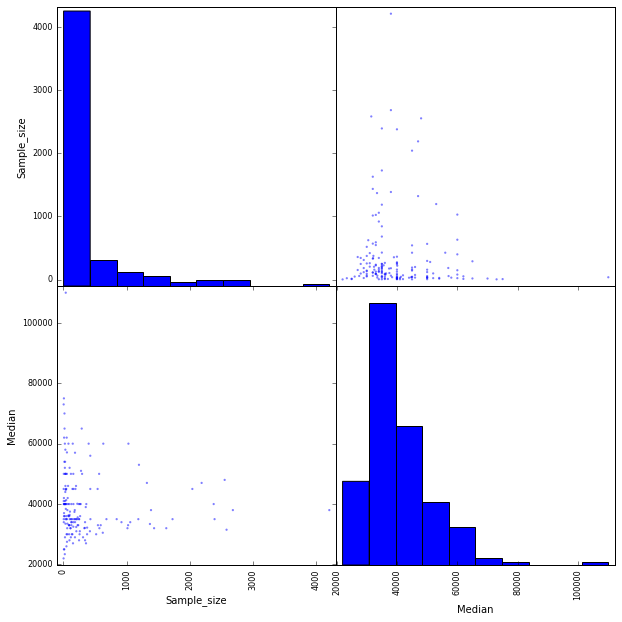

In [25]:
from pandas.plotting import scatter_matrix 

scatter_matrix(recent_grads[["Sample_size","Median"]], figsize=(10,10))
plt.show()

The above scatter matrix plot shows a histogram for each variable and the scatter plot of the comparison between the 2 variables.

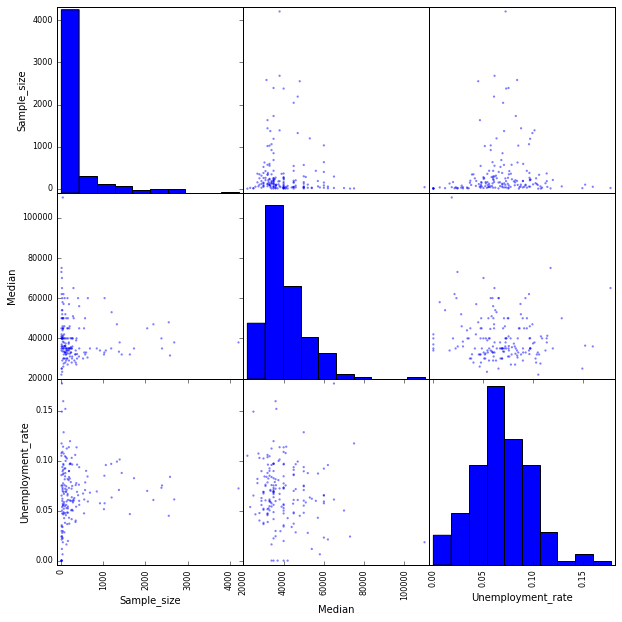

In [26]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]], figsize=(10,10))
plt.show()

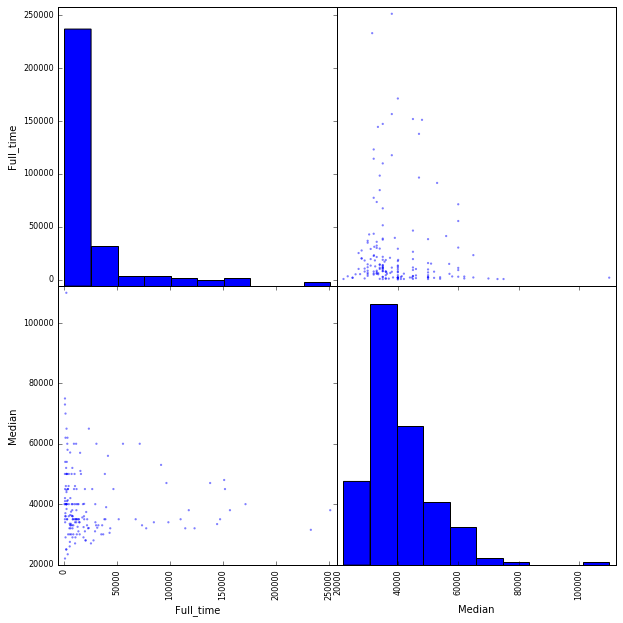

In [27]:
scatter_matrix(recent_grads[["Full_time","Median"]], figsize=(10,10))
plt.show()

# Visualizing data with bar plots



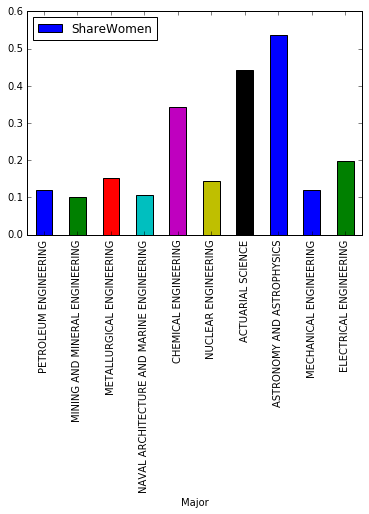

In [28]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
plt.show()

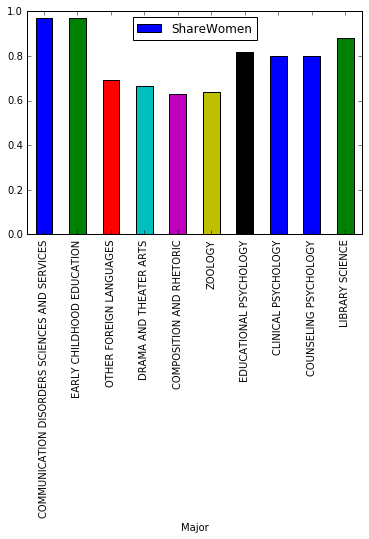

In [29]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')
plt.show()

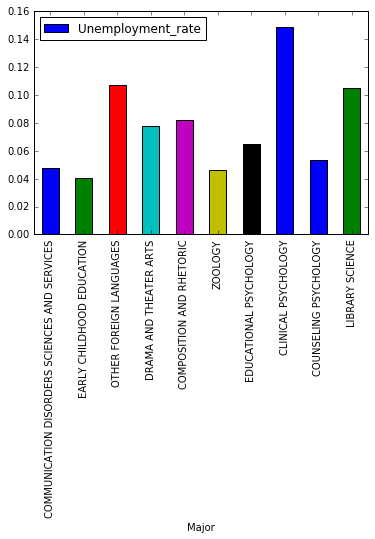

In [30]:
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')
plt.show()

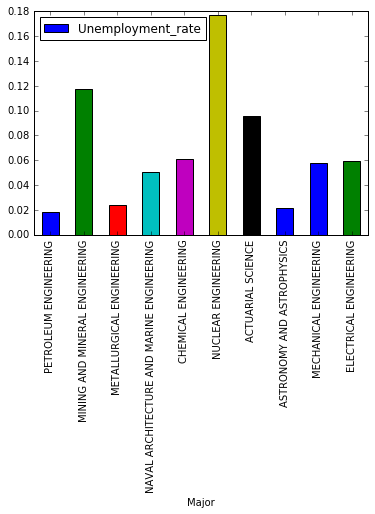

In [31]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
plt.show()

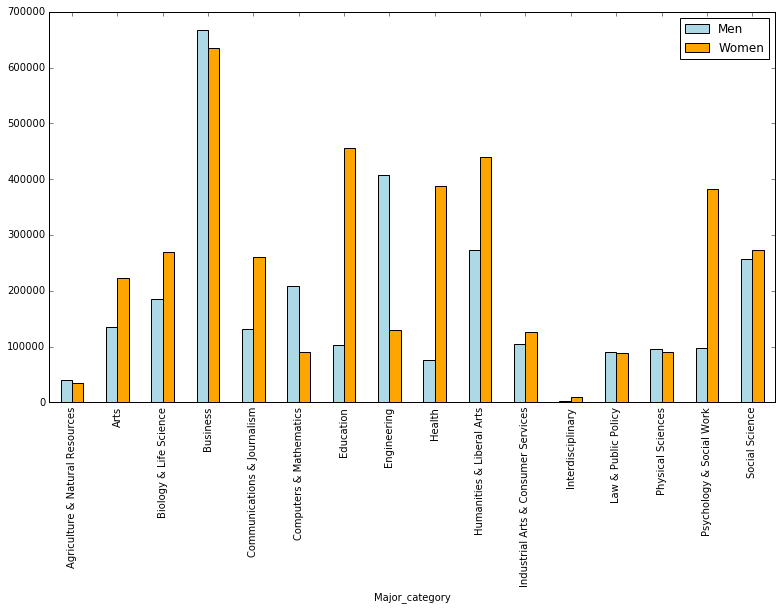

In [32]:
#grouped bar plot to compare number of men with number of women in each category of majors
recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.bar(figsize=(13, 7), color=["lightblue","orange"])


Here are some conclusions we can draw from the plot above:
1. The top major chosen is `Business`.
2. Few majors like `Education`, `Health` and `Psychology & Social Work` are highly dominated by females
3. Few majors like `Engineering` and `Computers & Mathematics` are popular amongst males
4. `Interdisciplinary` is the least popular major.


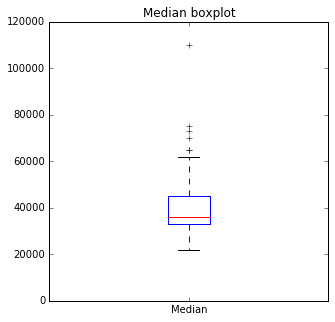

In [33]:
#box plot to show distributions of median salaries and unemployment rate
recent_grads["Median"].plot(kind="box", figsize=(5,5), title="Median boxplot")
plt.ylim(0,120000)
plt.show()

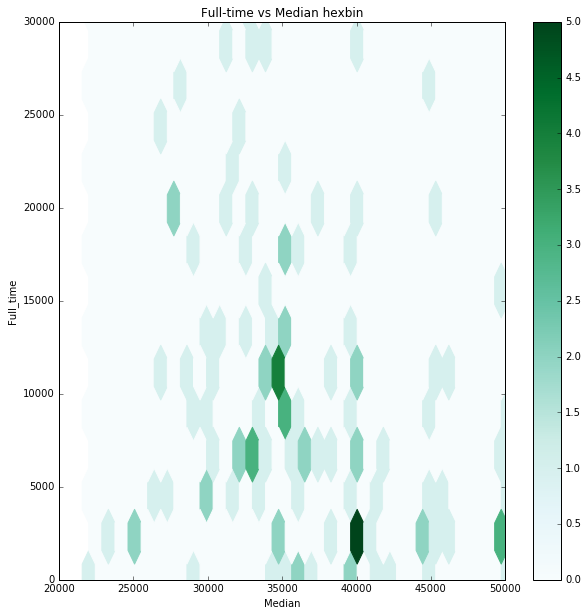

In [66]:
#hexagonal bin plot
recent_grads[["Median","Full_time"]].plot.hexbin(x="Median", y="Full_time",figsize=(10,10), title="Full-time vs Median hexbin", 
                                           gridsize=100, sharex=False, xlim=(20000,50000), ylim=(0,30000))